## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### What is a stroke?
Stroke is a medical emergency. A stroke occurs when blood flow to a part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die within minutes

### Risk factors for having a stroke include:
- Age: People aged 55 years and over

- Hypertension: if the systolic pressure is 140 mm Hg or more, or the diastolic pressure is 90 mm Hg or more

- Hypercholesterolemia: If the cholesterol level in the blood is 200 milligrams per deciliter

- Smoking

- Diabetes

- Obesity: if the body mass index (BMI) is 30 or more

In [2]:
import numpy as np 
import pandas as pd 
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Explore Data

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Variance features Distribution

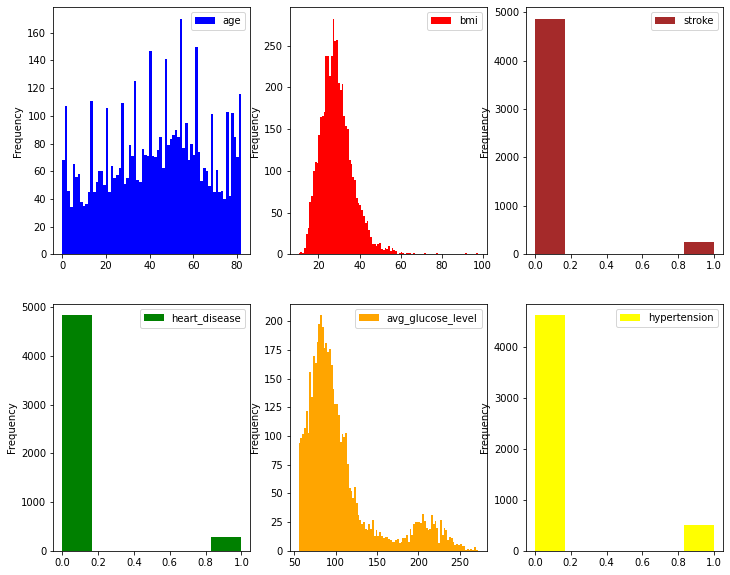

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
df.plot(kind="hist", y="hypertension", bins=6, color="yellow", ax=axes[1][2])
df.plot(kind="hist", y="stroke", bins=6, color="brown", ax=axes[0][2])
plt.show()

We have good distribution for age but there are some putlier for BMI beside that the Avg glucose distribution is reasonable because the normal avg of blood in sugar is less than 140 , that may be not good this feature will not be helpful to know if diabetes have correlation between diabetes and strokes

#### Data Summary ( Check for missing values )

In [7]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  5110
Columns  :  12

Features : 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   201

Unique values :  
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


#### Data Visualization


#### Fixing BMI missing and outlier value

- There are lot of outliers in BMI
- Normally BMI will be fall into the range between 18.5 to 49.9 so we will see what happend with stroke if BMI >=50

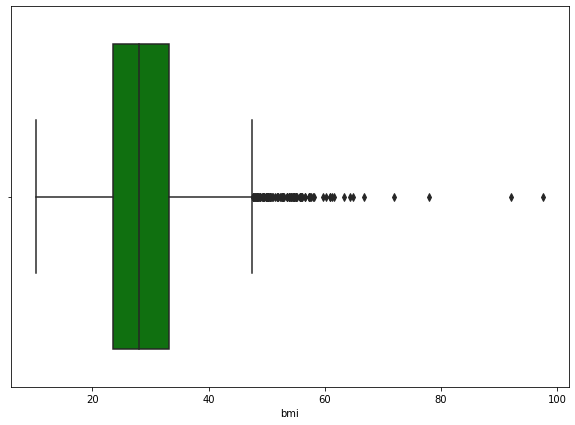

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

In [9]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [10]:
print(bmi_outliers['stroke'].value_counts())

0    78
1     1
Name: stroke, dtype: int64


Adjust the outlier: 
- If BMI >= 50 we will adjust to 50

Fillna
- If BMI is missing then we assign the avg value to BMI

In [11]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
df["bmi"] = df["bmi"].fillna(28.4)

Doubel check again on missing value

In [12]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


#### Base on gluco level and numeral chacteristic

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

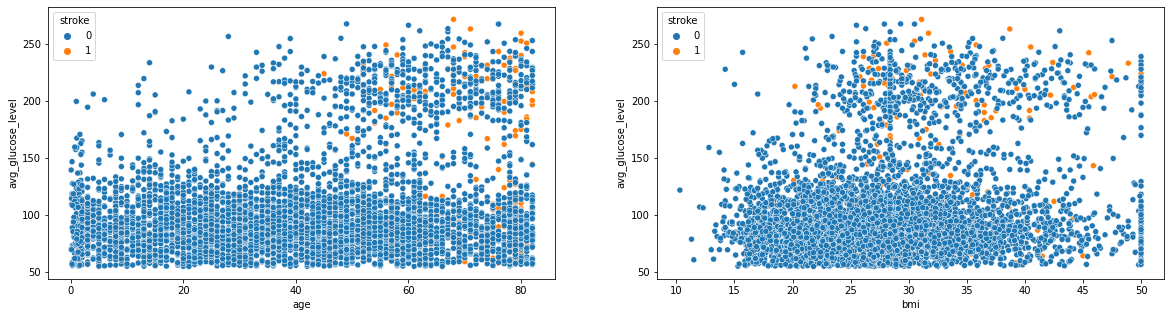

In [13]:
df_frequency=pd.concat([df['avg_glucose_level'],df['age'],df['bmi'],df['stroke']],axis=1)
fig,ax=plt.subplots(ncols=2,figsize=(20,5))
sns.scatterplot(data=df_frequency,y="avg_glucose_level",x="age",hue="stroke",ax=ax[0])
sns.scatterplot(data=df_frequency,y="avg_glucose_level",x="bmi",hue="stroke",ax=ax[1])


- Avg glucose level is high with old people are more likely to be stroke
- BMI >25 with high avg glucose are likey to be stroke

#### Base on Demographics

In [14]:
df_demographic=pd.concat([df['age'],df['gender'],df['ever_married'],df['work_type'],df['Residence_type'],df['smoking_status'], df['bmi'],df['stroke']],axis=1)

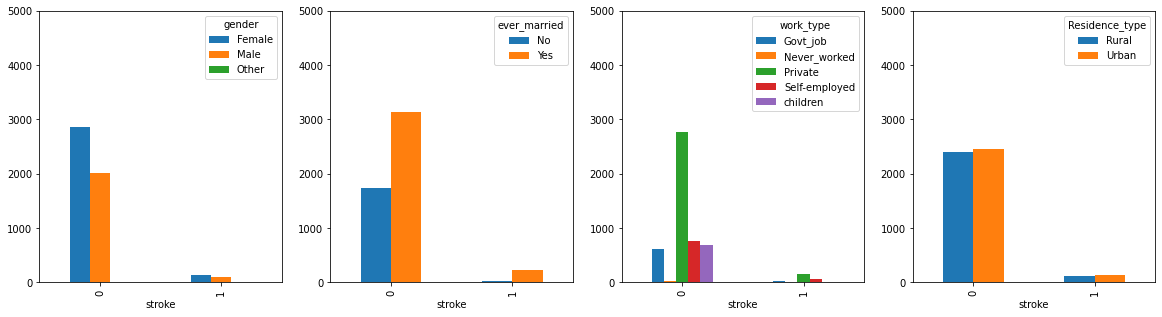

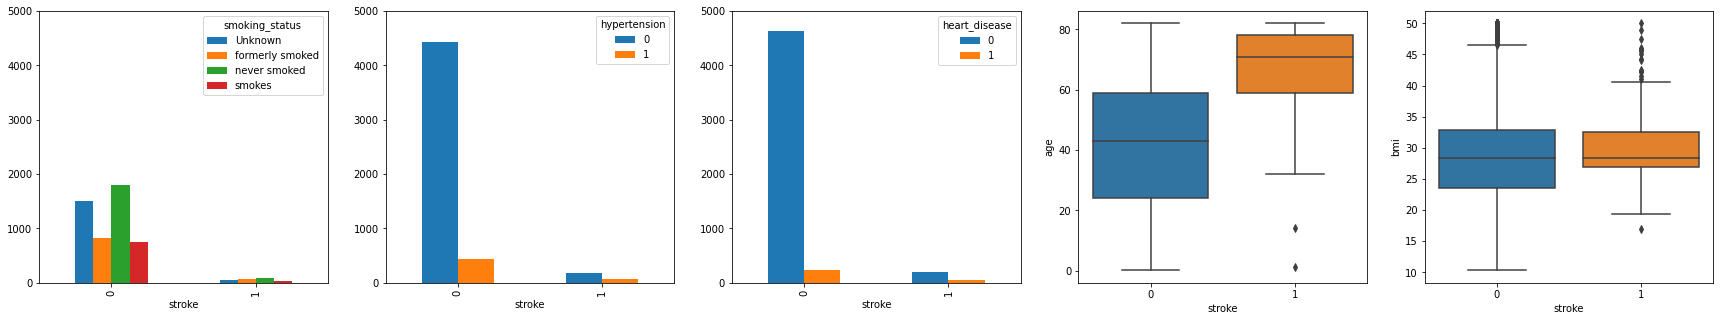

In [15]:
fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(df['stroke'],df['gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['stroke'],df['ever_married']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['stroke'],df['work_type']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['stroke'],df['Residence_type']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3, ax4, ax5)=plt.subplots(ncols=5,figsize=(30,5))
pd.crosstab(df['stroke'],df['smoking_status']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['stroke'],df['hypertension']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['stroke'],df['heart_disease']).plot(kind='bar',ax=ax3, ylim=[0,5000])
_box=sns.boxplot(data = df_demographic,x='stroke',y='age', ax=ax4)
_box=sns.boxplot(data = df_demographic,x='stroke',y='bmi', ax=ax5)

While the figures indeed show some disparity in numbers between stroke and no stroke, the distribution of each category is very similar. We see that age play a major factor in stroke and no stroke. 
besides that other figures shows that each category cannot be used alone as a factor to decide stroke. we will need to weigh in all these features to build our model.

### Feature Engineering and Selection

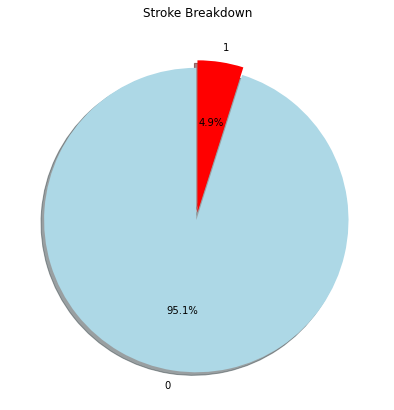

In [16]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Stroke Breakdown')
plt.show()

- Only 5% percent of people have Stroke !
- It is not a great ratio to have. This shows an imbalance in the dataset which can result in predictors making false positives/negatives because the attrition data is undersampled. We will need to counter this issue later when building our model.

### 4.2 Correlation
Since we have a dataset with mixed features: categorical and numerical, we cannot simply use standard correlation function (Pearson coefficient). We will have to split the features into separate tables, and:

- Measure numerical data correlation via Pearson
- Measure categorical data via Cramer's V function.

In [17]:
df_categorical=df.loc[:,df.dtypes==np.object]
df_categorical = df_categorical[['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']]
df_categorical.head()

<ipython-input-17-033396a28104>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical=df.loc[:,df.dtypes==np.object]


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


<ipython-input-18-31068de84502>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))


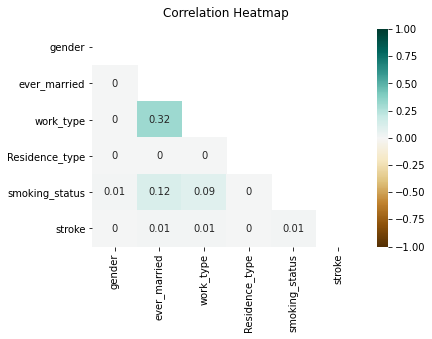

In [18]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame() 

for i in df_categorical.columns :
    df_categorical_encoded[i]=label.fit_transform(df_categorical[i])
df_categorical_encoded['stroke'] = df['stroke']
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

rows= []

for var1 in df_categorical_encoded:
    col = []
    for var2 in df_categorical_encoded :
        cramers =cramers_V(df_categorical_encoded[var1], df_categorical_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
cramerv_matrix = pd.DataFrame(cramers_results, columns = df_categorical_encoded.columns, index =df_categorical_encoded.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))
cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We see here that the categorical columns are NOT CORRELATED with customer churn by themselves. This supports the previous figures that show similar distribution between stroke and no stroke across all demographic. Building an accurate model without considering the numerical values is impossible.

#### Now let's check the correlation of the numerical values.

In [19]:
df_numerical=df.loc[:,df.dtypes!=np.object]
df_numerical=df_numerical.drop(['id'],axis=1)
df_numerical.head()

<ipython-input-19-499f69e78af4>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_numerical=df.loc[:,df.dtypes!=np.object]


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.4,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


<ipython-input-20-e0d35df789fe>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(num_corr, dtype=np.bool))


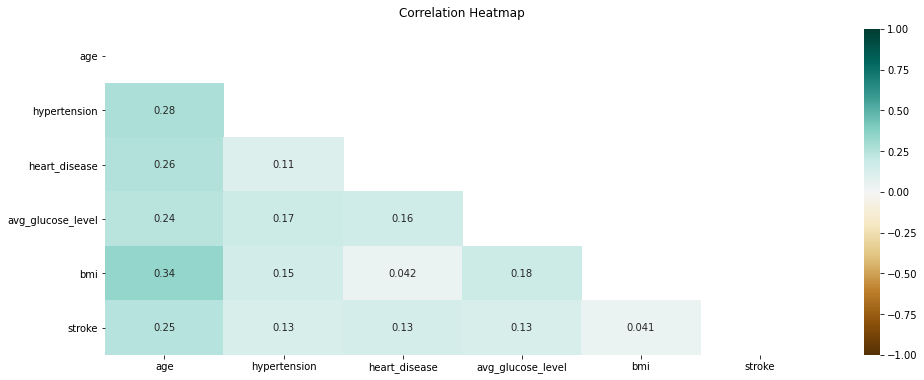

In [20]:
##Point Biserial Correlation
from scipy import stats
num_corr=df_numerical.corr()
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(num_corr, dtype=np.bool))
num_heatmap = sns.heatmap(num_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
num_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We now see better correlation measurements to the stroke. In the heatmap above, the correlation coefficient of stroke to all feature columns are identical in numbers, with mirroring signs (+ and -).

Let's view them better:

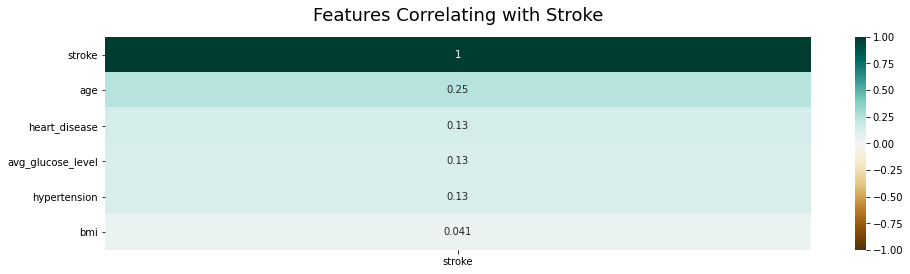

In [21]:
fig, ax=plt.subplots(ncols=1,figsize=(15, 5))

heatmap = sns.heatmap(num_corr[['stroke']].sort_values(by='stroke', ascending=False), ax=ax,vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':18}, pad=16);

fig.tight_layout(pad=5)

We see above that the following features are not correlated with customer churn (between -0.1 and +0.1) : BMI


#### Removing Non-Correlating Columns¶

In [87]:
df_model=df
df_model=df_model.drop(['id'],axis=1)
df_model.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.4,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### One Hot Encoding

In [88]:
df_oh=pd.get_dummies(df_model)
list(df_oh.columns)

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [89]:
df_oh.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.4,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


#### Model Training
Now we train different classifiers and try to obtain the most accurate model. We will utilize:
- Baseline: 
    - Logistic regression
- Manual ML:
    - Random Forest
    - Gradient Boosting
    - XGBoost
    - MLPClassifier Multilayer Perceptron Classsifier
- Auto ML:
    - Azure Automl

We will run the base line and compare with "manual ml" then setup auto ml which provided by Microsoft to see the difference

In [153]:

from imblearn.over_sampling import SMOTE

X = df_oh.loc[:, df_oh.columns != 'stroke']
y = df_oh['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sm = SMOTE(sampling_strategy='minority', k_neighbors=25, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#### Base Line

In [154]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train_res, y_train_res)

/Users/cuongv.nguyen/opt/anaconda3/envs/causalnex/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

#### Gradient Boosting

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

#### XGBoost

In [157]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

/Users/cuongv.nguyen/opt/anaconda3/envs/causalnex/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### First Prediction Model


In [158]:
y_rf=rf_clf.predict(X_test)
y_xgb=xgb_model.predict(X_test)
y_gb=gb_clf.predict(X_test)
y_lgr = lgr.predict(X_test)

#### First Evaluation

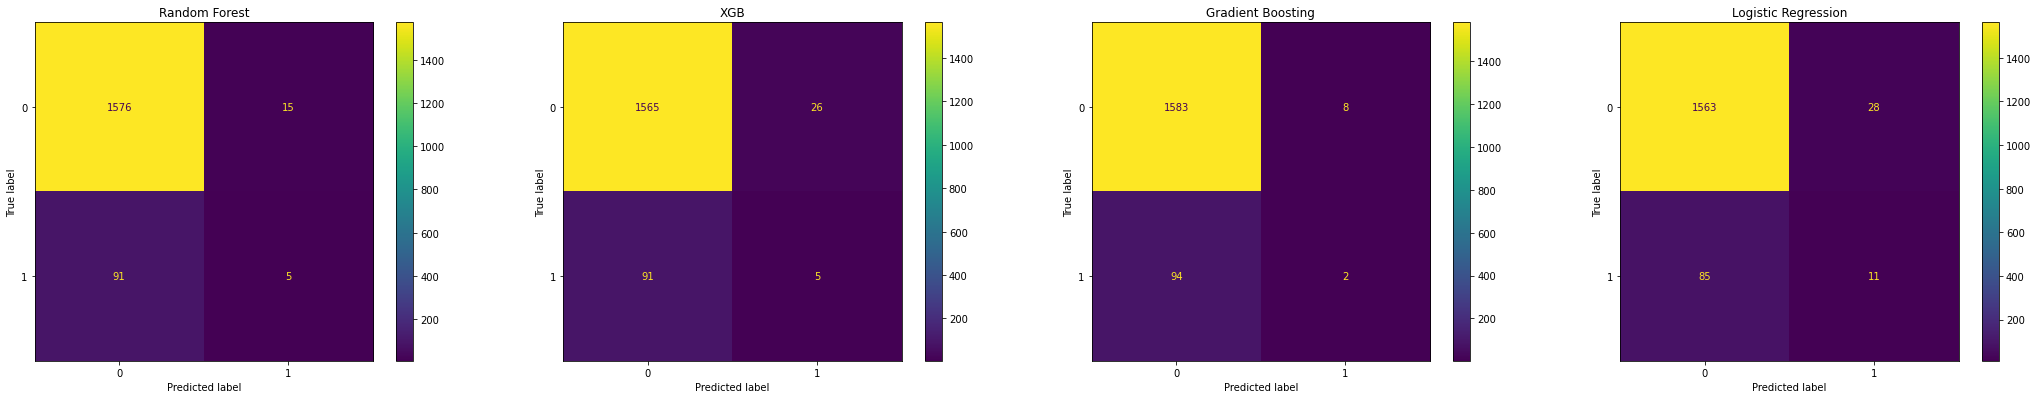

In [159]:
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(ncols=4, figsize=(30,6))
plot_confusion_matrix(rf_clf, X_test, y_test, ax=ax[0])
ax[0].title.set_text('Random Forest')
plot_confusion_matrix(xgb_model, X_test, y_test, ax=ax[1])
ax[1].title.set_text('XGB')
plot_confusion_matrix(gb_clf, X_test, y_test, ax=ax[2])
ax[2].title.set_text('Gradient Boosting')
plot_confusion_matrix(lgr, X_test, y_test, ax=ax[3])
ax[3].title.set_text('Logistic Regression')
fig.tight_layout(pad=4)

In [160]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
print('Random Forest Classifier')
print(classification_report(y_test, y_rf))
print('------------------------')
print('XGB')
print(classification_report(y_test, y_xgb))
print('------------------------')
print('Gradient Boosting')
print(classification_report(y_test, y_gb))
print('------------------------')
print('Logistic Regression')
print(classification_report(y_test, y_lgr))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1591
           1       0.25      0.05      0.09        96

    accuracy                           0.94      1687
   macro avg       0.60      0.52      0.53      1687
weighted avg       0.91      0.94      0.92      1687

------------------------
XGB
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1591
           1       0.16      0.05      0.08        96

    accuracy                           0.93      1687
   macro avg       0.55      0.52      0.52      1687
weighted avg       0.90      0.93      0.91      1687

------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1591
           1       0.20      0.02      0.04        96

    accuracy                           0.94      1687
   macro avg       0.57      0.

We see in both the confusion matrix and classification report that all model works best with recall score above 90% for no stroke. But classification for stroke is shit all model <10%

The best f1-score from Logistic Regression

#### Tuning Hyperparameters
Now we will attempt to raise the model accuracy even more. We can achieve this by tuning the algorithm hyperparameters. Since SVM and Logistric regression produced very low accuracy, we will not consider this algorithm any further.

Tunning RandomForest by Random Search

In [161]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [162]:
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#Fit the random search model
rf_random.fit(X_train_res, y_train_res)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


Random Forest Classifier (Optimized)
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1591
           1       0.25      0.03      0.06        96

    accuracy                           0.94      1687
   macro avg       0.60      0.51      0.51      1687
weighted avg       0.90      0.94      0.92      1687



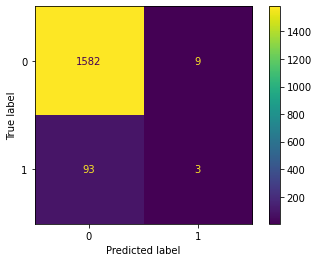

In [164]:
rf_clf_opt= RandomForestClassifier(n_estimators=800, min_samples_split=5, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=40, bootstrap=True)
rf_clf_opt.fit(X_train_res,y_train_res)
y_rf_opt=rf_clf_opt.predict(X_test)
print('Random Forest Classifier (Optimized)')
print(classification_report(y_test, y_rf_opt))
_rf_opt=plot_confusion_matrix(rf_clf_opt, X_test, y_test)

Tunning Gradient Boost By Grid Search

In [126]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,100,10),
              'learning_rate': [0.01, 0.1,0.5,1],
              'max_depth': range(3,10,1),
              'min_samples_leaf':[20,50,100],
            'min_samples_split':[100,300,500],
              'subsample':[0.8,1],
              'max_features':['sqrt','auto']}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=42), 
                        param_grid = param_test1, 
                        scoring='f1-score',n_jobs=-1, cv=5, verbose=3)
gsearch1.fit(X_train_res,y_train_res)
print(gsearch1.best_params_)

Fitting 5 folds for each of 8064 candidates, totalling 40320 fits
{'learning_rate': 1, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 100, 'n_estimators': 70, 'subsample': 0.8}


Gradient Boosting (Optimized)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1591
           1       0.19      0.11      0.14        96

    accuracy                           0.92      1687
   macro avg       0.57      0.54      0.55      1687
weighted avg       0.90      0.92      0.91      1687



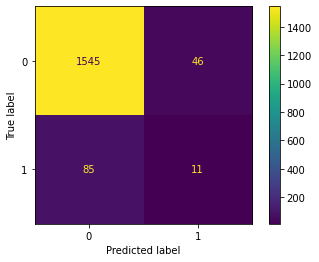

In [165]:
gb_clf_opt=GradientBoostingClassifier(n_estimators=70,learning_rate=1.0, min_samples_split=100,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
gb_clf_opt.fit(X_train_res,y_train_res)
y_gb_opt=gb_clf_opt.predict(X_test)
print('Gradient Boosting (Optimized)')
print(classification_report(y_test, y_gb_opt))
_gbopt=plot_confusion_matrix(gb_clf_opt, X_test, y_test)

Feature: 0, Score: 0.27410
Feature: 1, Score: 0.00597
Feature: 2, Score: 0.00236
Feature: 3, Score: 0.04037
Feature: 4, Score: 0.01801
Feature: 5, Score: 0.10544
Feature: 6, Score: 0.06703
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00457
Feature: 9, Score: 0.01232
Feature: 10, Score: 0.03982
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.04854
Feature: 13, Score: 0.04829
Feature: 14, Score: 0.00057
Feature: 15, Score: 0.01781
Feature: 16, Score: 0.02508
Feature: 17, Score: 0.13479
Feature: 18, Score: 0.05407
Feature: 19, Score: 0.06098
Feature: 20, Score: 0.03987


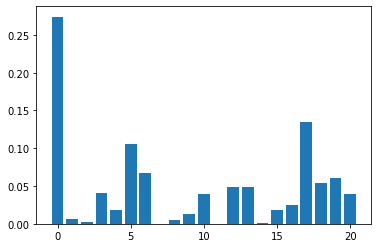

In [128]:
# get importance
importance = gb_clf_opt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Tunning XGB By Grid Search

In [167]:
param_test2 = {'n_estimators':range(20,100,10),
              'learning_rate': [0.01, 0.1, 0.5,1],
              'max_depth': range(3,5,1),
              'subsample': [0.5,0.8,1],
              'colsample_bytree':[0.5,0.8,1],
              'max_features': ['sqrt','auto']}
gsearch2 = GridSearchCV(estimator = XGBClassifier(random_state=10,objective='binary:logistic'), 
                        param_grid = param_test2, 
                        scoring='recall',n_jobs=-1, cv=5, verbose=1) #roc_auc
gsearch2.fit(X_train_res,y_train_res)
print(gsearch2.best_params_)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


/Users/cuongv.nguyen/opt/anaconda3/envs/causalnex/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:06:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:06:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.8, 'learning_rate': 0.5, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 90, 'subsample': 1}


[19:06:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:06:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB (Optimized)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1591
           1       0.33      0.09      0.15        96

    accuracy                           0.94      1687
   macro avg       0.64      0.54      0.56      1687
weighted avg       0.91      0.94      0.92      1687



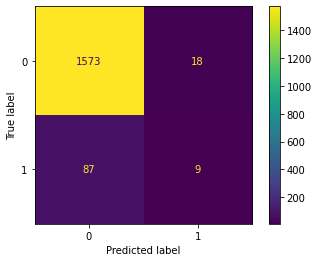

In [168]:
xgb_model_opt=XGBClassifier(n_estimators=90,learning_rate=0.5,colsample_bytree=0.8,gamma = 1, max_depth=4,subsample=1 ,max_features='sqrt',random_state=10,objective='binary:logistic')
xgb_model_opt.fit(X_train_res,y_train_res)
y_xgb_opt=xgb_model_opt.predict(X_test)
print('XGB (Optimized)')
print(classification_report(y_test, y_xgb_opt))
_xgbopt=plot_confusion_matrix(xgb_model_opt, X_test, y_test)

Feature: 0, Score: 0.03009
Feature: 1, Score: 0.00483
Feature: 2, Score: 0.00380
Feature: 3, Score: 0.00692
Feature: 4, Score: 0.00414
Feature: 5, Score: 0.05419
Feature: 6, Score: 0.07792
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.23498
Feature: 9, Score: 0.05082
Feature: 10, Score: 0.04005
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.03869
Feature: 13, Score: 0.05726
Feature: 14, Score: 0.10543
Feature: 15, Score: 0.01992
Feature: 16, Score: 0.04670
Feature: 17, Score: 0.06236
Feature: 18, Score: 0.05343
Feature: 19, Score: 0.04569
Feature: 20, Score: 0.06279


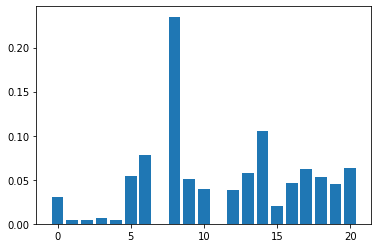

In [169]:
# get importance
importance = xgb_model_opt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [177]:
list(importance)

[0.030088356,
 0.004825931,
 0.0038022941,
 0.0069163493,
 0.004139677,
 0.054185264,
 0.07792168,
 0.0,
 0.23497811,
 0.05081828,
 0.04005132,
 0.0,
 0.03868639,
 0.057255376,
 0.10542705,
 0.019924827,
 0.046699822,
 0.062364347,
 0.05343236,
 0.045690477,
 0.06279214]

In [178]:
X_cols = X.columns
list(X_cols)

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [185]:
importance_df = pd.DataFrame({'feature_name':list(X_cols),
                             'feature_values': list(importance)})
importance_df.sort_values('feature_values', ascending =False)

,feature_name,feature_values
8,ever_married_No,0.234978
14,work_type_children,0.105427
6,gender_Male,0.077922
20,smoking_status_smokes,0.062792
17,smoking_status_Unknown,0.062364
13,work_type_Self-employed,0.057255
5,gender_Female,0.054185
18,smoking_status_formerly smoked,0.053432
9,ever_married_Yes,0.050818
16,Residence_type_Urban,0.046700


#### MLP NN Classifier

In [199]:
# X_train_res1 = X_train_res.drop(['work_type_Never_worked','gender_Other','heart_disease','bmi'], axis=1).values
# X_test1 = X_test.drop(['work_type_Never_worked','gender_Other','heart_disease','bmi'], axis=1).values

In [201]:
# mlp = MLPClassifier(hidden_layer_sizes=(1000,300, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
mlp=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)
mlp.fit(X_train_res, y_train_res)
mlp_pred= mlp.predict(X_test)

mlp_score = mlp.score(X_train_res,y_train_res)
mlp_test = mlp.score(X_test, y_test)


y_pred =mlp.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',mlp_score)
print('Testing Score \n',mlp_test)
print(cm)

Iteration 1, loss = 1.48566832
Iteration 2, loss = 0.48140328
Iteration 3, loss = 0.44157078
Iteration 4, loss = 0.40473785
Iteration 5, loss = 0.35257536
Iteration 6, loss = 0.30274183
Iteration 7, loss = 0.23268572
Iteration 8, loss = 0.18341684
Iteration 9, loss = 0.16917988
Iteration 10, loss = 0.15156096
Iteration 11, loss = 0.15628009
Iteration 12, loss = 0.19506004
Iteration 13, loss = 0.15854043
Iteration 14, loss = 0.14408573
Iteration 15, loss = 0.17157110
Iteration 16, loss = 0.14454334
Iteration 17, loss = 0.13029382
Iteration 18, loss = 0.13073843
Iteration 19, loss = 0.12687953
Iteration 20, loss = 0.12726460
Iteration 21, loss = 0.13768222
Iteration 22, loss = 0.11967934
Iteration 23, loss = 0.11541855
Iteration 24, loss = 0.12208012
Iteration 25, loss = 0.14532872
Iteration 26, loss = 0.12274509
Iteration 27, loss = 0.12850500
Iteration 28, loss = 0.13282300
Iteration 29, loss = 0.11408269
Iteration 30, loss = 0.12394971
Iteration 31, loss = 0.12303811
Iteration 32, los

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1591
           1       0.23      0.24      0.23        96

    accuracy                           0.91      1687
   macro avg       0.59      0.60      0.59      1687
weighted avg       0.91      0.91      0.91      1687



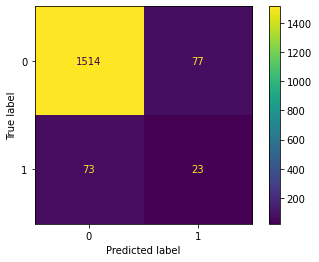

In [204]:
print(classification_report(y_test, y_pred))
_mlpnn=plot_confusion_matrix(mlp, X_test, y_test)

We saw that MLP NN perform better than Gradient Boost and Logistic Regression as baseline

In [205]:
cm = confusion_matrix(y_test,y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [206]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9110847658565501 
 The Missclassification = 1-Accuracy =                   0.08891523414344993 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.23958333333333334 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9516027655562539 



From the above statistics it is clear that the model is more highly specific than sensitive. The negative cases are predicted more accurately than the positives.

### Now we will use Auto ML from Azure to see if it give better performance
We will cover:
- Create an experiment using an existing workspace.
- Configure AutoML using AutoMLConfig.
- Train the model using remote compute.
- Explore the results.
- Test the fitted model.

#### Setup
As part of the setup you have already created an Azure ML Workspace object. For Automated ML you will need to create an Experiment object, which is a named object in a Workspace used to run experiments.

In [1]:

from matplotlib import pyplot as plt
import pandas as pd
import os

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.core.dataset import Dataset
from azureml.train.automl import AutoMLConfig

In [2]:
print("You are currently using version", azureml.core.VERSION, "of the Azure ML SDK")

You are currently using version 1.21.0 of the Azure ML SDK


Interactive Authentication

Interactive authentication is the default mode when using Azure ML SDK.

When you connect to your workspace using workspace.from_config, you will get an interactive login dialog.

In [3]:
from azureml.core import Workspace
#ws = Workspace.from_config()
# We can setup manual for first time
# ws = Workspace(subscription_id="my-subscription-id",
#                resource_group="my-ml-rg",
#                workspace_name="my-ml-workspace")

ws = Workspace(subscription_id="my-subscription0id",
               resource_group="my-resource-group",
               workspace_name="my-workspace")

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


In [27]:
# choose a name for experiment
experiment_name = 'automl-classification-stroke-remote'

experiment=Experiment(ws, experiment_name)

output = {}
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
outputDf = pd.DataFrame(data = output, index = [''])
outputDf.T

#### Create or Attach existing AmlCompute
A compute target is required to execute the Automated ML run. In this tutorial, you create AmlCompute as your training compute resource.

#### Creation of AmlCompute takes approximately 5 minutes.
If the AmlCompute with that name is already in your workspace this code will skip the creation process. As with other Azure services, there are limits on certain resources (e.g. AmlCompute) associated with the Azure Machine Learning service. Please read this article on the default limits and how to request more quota.

In [5]:
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

# Choose a name for your CPU cluster
cpu_cluster_name = "cpu-cluster"

# Verify that cluster does not exist already
try:
    compute_target = ComputeTarget(workspace=ws, name=cpu_cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_DS12_V2',
                                                           max_nodes=6)
    compute_target = ComputeTarget.create(ws, cpu_cluster_name, compute_config)

compute_target.wait_for_completion(show_output=True)

Found existing cluster, use it.
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


#### Data
#### Load Data
- Load the dataset from a csv file containing both training features and labels. 
- Because We have dataset in local computer. So we will upload the data set to azure data store then convert to tabular format
- The features are inputs to the model, while the training labels represent the expected output of the model. 
- Next, we'll split the data using random_split and extract the training data for the model.

In [28]:
#Upload data to datastorged
datastore = ws.get_default_datastore()
datastore.upload_files(files = ['healthcare-dataset-stroke-data.csv'],
                       target_path = 'train-dataset/tabular/healthcare-dataset-stroke-data.csv',
                       overwrite = True,
                       show_progress = True)


In [7]:

from azureml.core import Dataset
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'train-dataset/tabular/healthcare-dataset-stroke-data.csv')])

# preview the first 3 rows of the dataset
dataset.take(3).to_pandas_dataframe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,True,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,True,Self-employed,Rural,202.21,N/A,never smoked,1
2,31112,Male,80.0,0,1,True,Private,Rural,105.92,32.5,never smoked,1


In [8]:
training_data, validation_data = dataset.random_split(percentage=0.8, seed=223)
label_column_name = 'stroke'

#### Train
Instantiate a AutoMLConfig object. This defines the settings and data used to run the experiment.

In [17]:
import logging
automl_settings = {
    "n_cross_validations": 5,
    "primary_metric": 'AUC_weighted', # or norm_macro_recall for imbalance class
    "enable_early_stopping": True,
    "max_concurrent_iterations": 5,
    "experiment_timeout_hours": 1,
    "verbosity": logging.INFO,
    "featurization": 'auto'
}

automl_config = AutoMLConfig(task = 'classification',
                             debug_log = 'automl_errors.log',
                             compute_target = compute_target,
                             training_data = training_data,
                             label_column_name = label_column_name,
                             **automl_settings
                            )

Call the submit method on the experiment object and pass the run configuration. Depending on the data and the number of iterations this can run for a while. Validation errors and current status will be shown when setting show_output=True and the execution will be synchronous.

In [18]:
remote_run = experiment.submit(automl_config, show_output = True)

Running on remote.
No run_configuration provided, running on cpu-cluster with default configuration
Running on remote compute: cpu-cluster
Parent Run ID: AutoML_223a8889-24dd-4133-a68f-21b7d34234f1

Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.
Current status: ModelSelection. Beginning model selection.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       ALERTED
DESCRIPTION:  To decrease model bias, please cancel the current run and fix balancing problem.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData
DETAILS:      Imbalanced data can lead to a falsely perceived positive effect of a model's accuracy because the input data has bias towards one class.
+---------------------------------+-------------------------

In [ ]:
remote_run

#### Results
Widget for Monitoring Runs
The widget will first report a "loading" status while running the first iteration. After completing the first iteration, an auto-updating graph and table will be shown. The widget will refresh once per minute, so you should see the graph update as child runs complete.

Note: The widget displays a link at the bottom. Use this link to open a web interface to explore the individual run details

In [ ]:
from azureml.widgets import RunDetails
RunDetails(remote_run).show()


In [19]:
best_run, fitted_model = remote_run.get_output()

Package:azureml-automl-runtime, training version:1.22.0, current version:1.21.0
Package:azureml-core, training version:1.22.0, current version:1.21.0.post2
Package:azureml-dataprep, training version:2.9.1, current version:2.8.2
Package:azureml-dataprep-native, training version:29.0.0, current version:28.0.0
Package:azureml-dataprep-rslex, training version:1.7.0, current version:1.6.0
Package:azureml-dataset-runtime, training version:1.22.0, current version:1.21.0
Package:azureml-defaults, training version:1.22.0, current version:1.21.0
Package:azureml-interpret, training version:1.22.0, current version:1.21.0
Package:azureml-pipeline-core, training version:1.22.0, current version:1.21.0
Package:azureml-telemetry, training version:1.22.0, current version:1.21.0
Package:azureml-train-automl-client, training version:1.22.0, current version:1.21.0
Package:azureml-train-automl-runtime, training version:1.22.0, current version:1.21.0.post1


In [20]:
print('Fitted Model')
print(fitted_model)
print('Best Run')
print(best_run)

Fitted Model
Pipeline(memory=None,
         steps=[('datatransformer',
                 DataTransformer(enable_dnn=None, enable_feature_sweeping=None,
                                 feature_sweeping_config=None,
                                 feature_sweeping_timeout=None,
                                 featurization_config=None, force_text_dnn=None,
                                 is_cross_validation=None,
                                 is_onnx_compatible=None, logger=None,
                                 observer=None, task=None, working_dir=None)),
                ('prefittedsoftvotingclassifier',...
                                                                                              dual=True,
                                                                                              fit_intercept=True,
                                                                                              intercept_scaling=1,
                                             

#### Print the properties of the model
The fitted_model is a python object and you can read the different properties of the object.

#### Test the fitted model
Now that the model is trained, split the data in the same way the data was split for training (The difference here is the data is being split locally) and then run the test data through the trained model to get the predicted values.

In [21]:
# convert the test data to dataframe
X_test_df = validation_data.drop_columns(columns=[label_column_name]).to_pandas_dataframe()
y_test_df = validation_data.keep_columns(columns=[label_column_name], validate=True).to_pandas_dataframe()

In [22]:
# call the predict functions on the model
y_pred = fitted_model.predict(X_test_df)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,

#### Calculate metrics for the prediction
Now visualize the data on a scatter plot to show what our truth (actual) values are compared to the predicted values from the trained model that was returned.



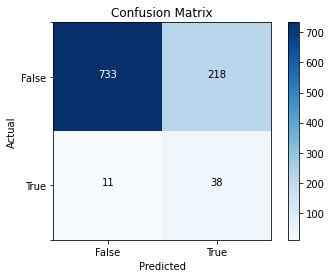

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

cf =confusion_matrix(y_test_df.values,y_pred)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
class_labels = ['False','True']
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks([-0.5,0,1,1.5],['','False','True',''])
# plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show()

In [25]:
TN=cf[0,0]
TP=cf[1,1]
FN=cf[1,0]
FP=cf[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [26]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.771 
 The Missclassification = 1-Accuracy =                   0.22899999999999998 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.7755102040816326 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.7707676130389064 



From the above statistics we saw that the Azure auto ML optimized better for sensitivity and specificity than manual model while the accuracy lower than manual model but in the imbalance classification we forcus more on precision and recall